## 1. Data Collection

### Import Necesary Library

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 


### Load Dataset

In [28]:
df = pd. read_csv('../data/BrentOilPrices.csv')
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


## 2. Data Preprocessing

In [3]:
df.shape

(9011, 2)

In [4]:
df.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [5]:
# Display the data types of each column
print(df.dtypes)

Date      object
Price    float64
dtype: object


## Data Cleaning 

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing Values:\n{missing_values}")

Missing Values:
Date     0
Price    0
dtype: int64


In [7]:
df.duplicated().sum()

0

### Data time Conversion

In [8]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

C:\Users\getac\AppData\Local\Temp\ipykernel_16972\2977810802.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [9]:
# Ensure 'Price' is a float
df['Price'] = df['Price'].astype(float)

In [10]:
df.dtypes

Price    float64
dtype: object

### Outlier Detection and Treatment

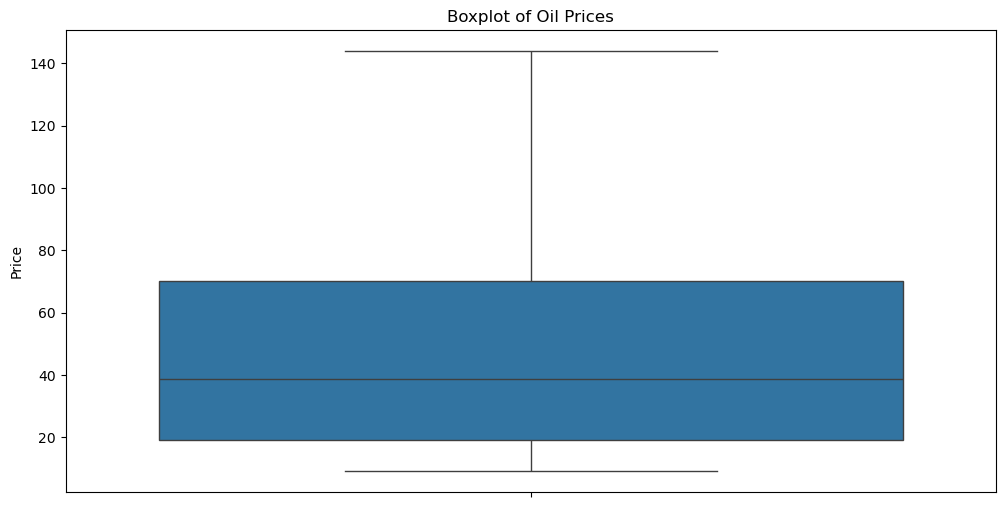

In [11]:
# Visualize the data to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['Price'])
plt.title('Boxplot of Oil Prices')
plt.show()


In [12]:
# Remove outliers using IQR method
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR)))]

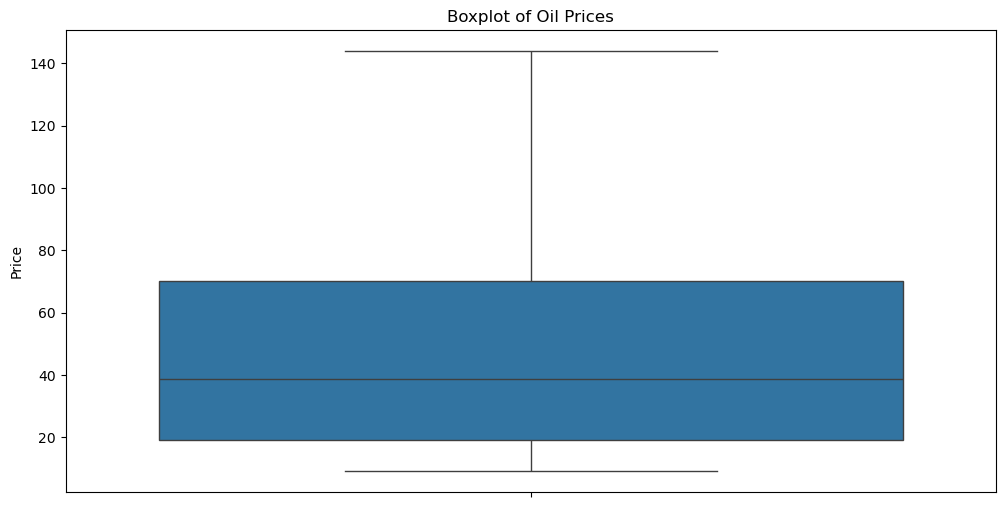

In [13]:
# Visualize the data to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['Price'])
plt.title('Boxplot of Oil Prices')
plt.show()

### Feature Engineering

In [14]:
# Example of creating new features from the Date index
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day


In [15]:
df.head()

,Price,Year,Month,Day
Date,,,,
1987-05-20,18.63,1987,5,20
1987-05-21,18.45,1987,5,21
1987-05-22,18.55,1987,5,22
1987-05-25,18.60,1987,5,25
1987-05-26,18.63,1987,5,26


## 3. Exploratory Data Analysis (EDA)

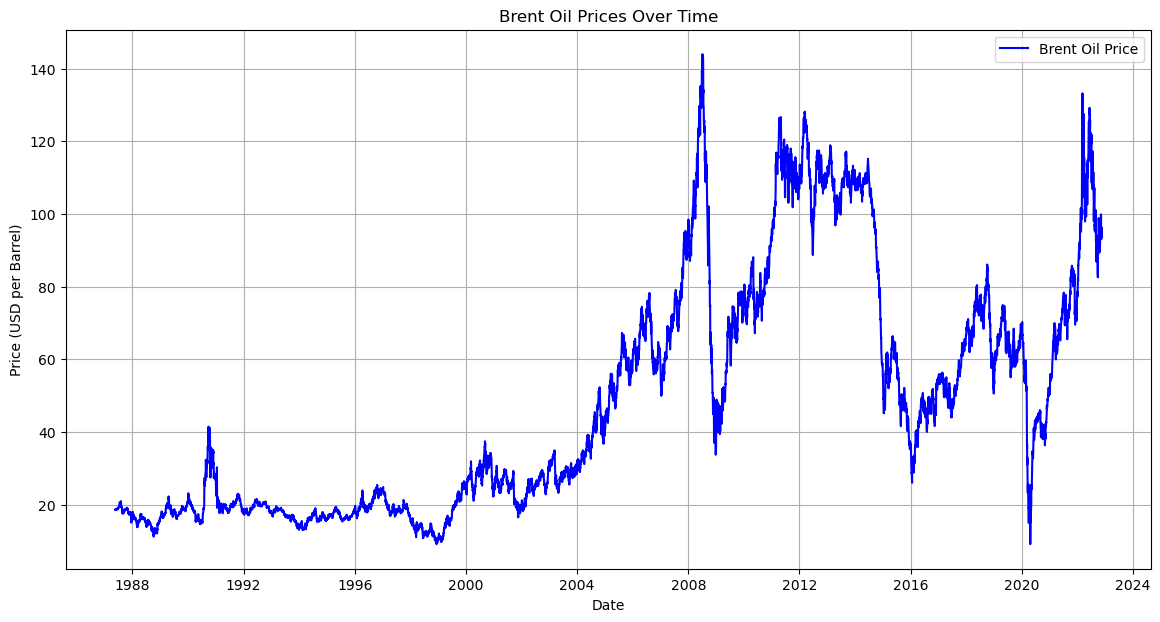

In [16]:
# Plotting the time series of Brent Oil Prices
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.legend()
plt.grid()
plt.show()

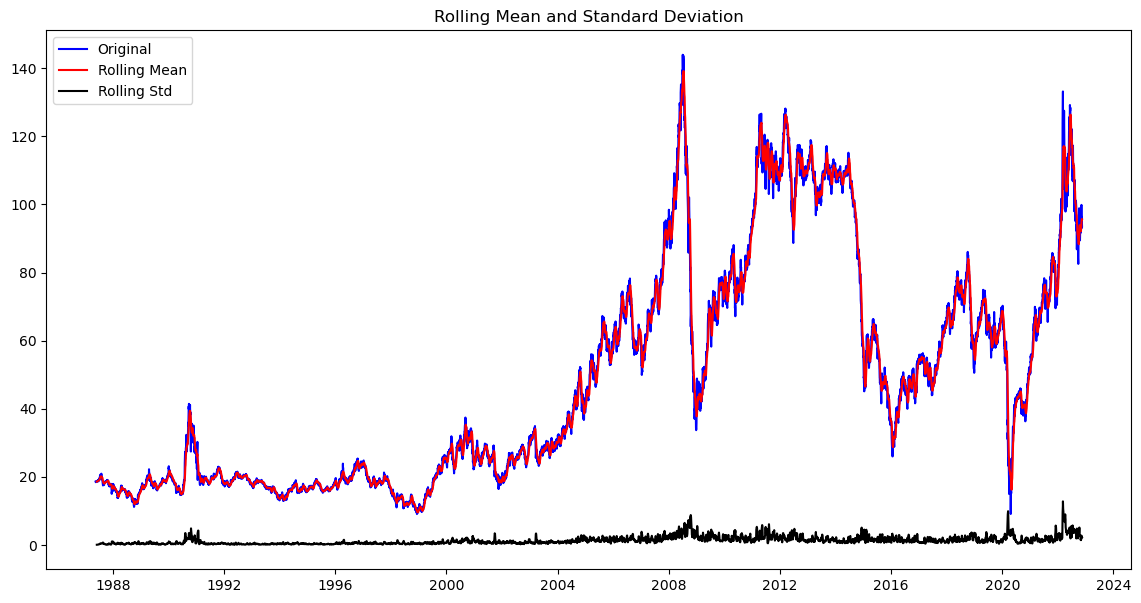

In [17]:
# Step 4: Checking for Stationarity
# You can apply tests like the Augmented Dickey-Fuller test here to check for stationarity
# For now, just a simple rolling mean and std deviation plot
rolling_mean = df['Price'].rolling(window=12).mean()
rolling_std = df['Price'].rolling(window=12).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Price'], label='Original', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.title('Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

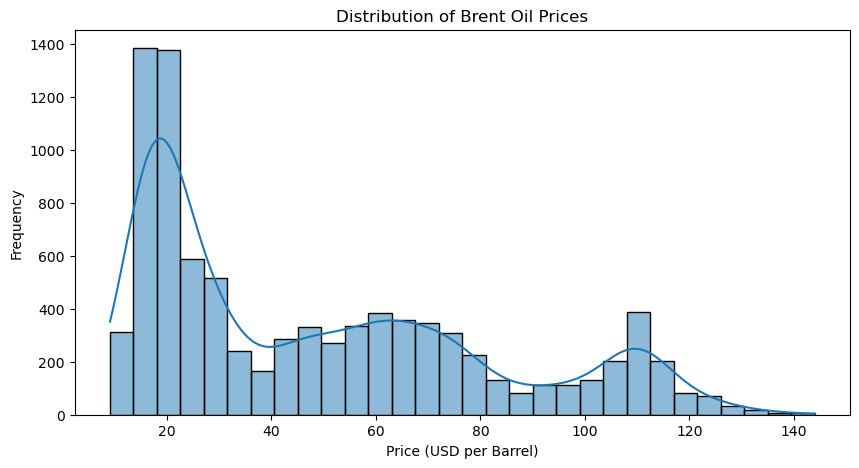

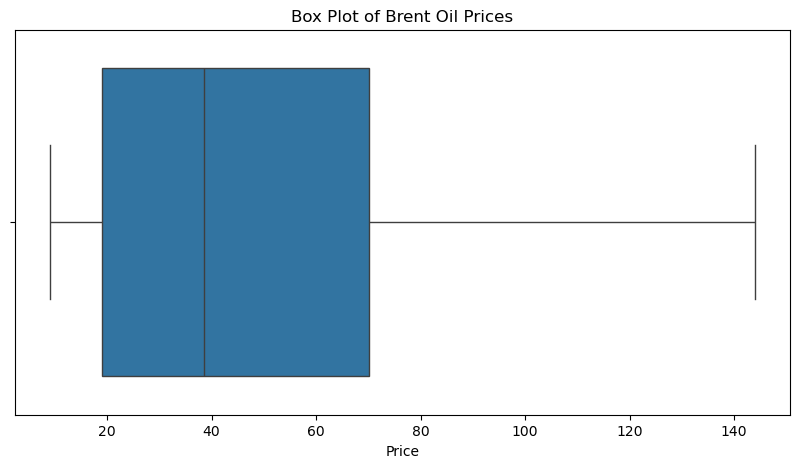

In [18]:
# Histogram of Prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price (USD per Barrel)')
plt.ylabel('Frequency')
plt.show()

# Box plot to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Brent Oil Prices')
plt.show()


### Seasonal Decomposition

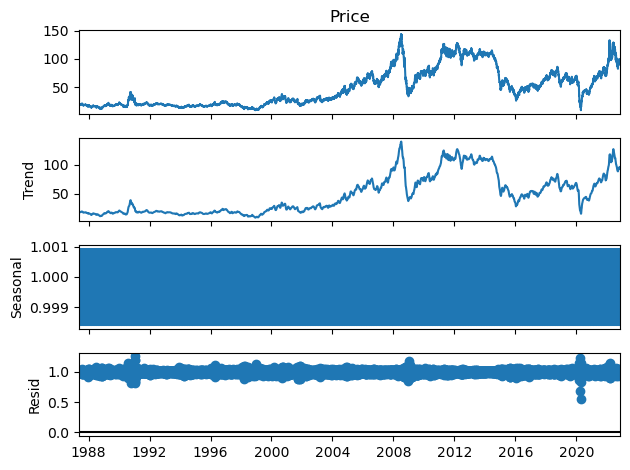

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Price'], model='multiplicative', period=12)

# Plot the decomposition
result.plot()
plt.show()


### Autocorrelation and Partial Autocorrelation Plots

<Figure size 1200x600 with 0 Axes>

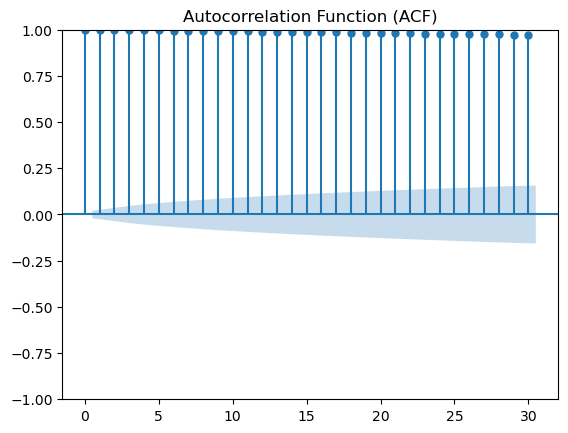

<Figure size 1200x600 with 0 Axes>

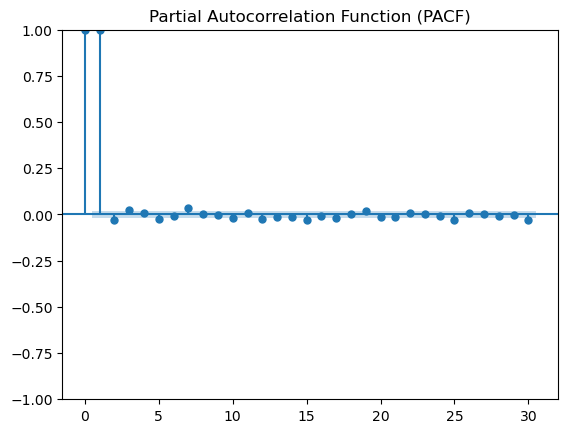

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(df['Price'], lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(df['Price'], lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


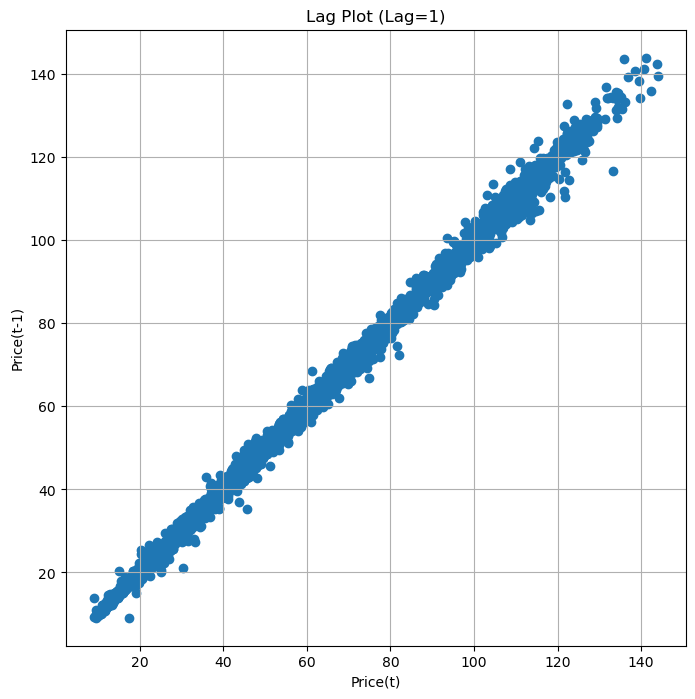

In [21]:
from pandas.plotting import lag_plot

# Plot lag plot
plt.figure(figsize=(8, 8))
lag_plot(df['Price'], lag=1)
plt.title('Lag Plot (Lag=1)')
plt.xlabel('Price(t)')
plt.ylabel('Price(t-1)')
plt.grid()
plt.show()


c:\Users\getac\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\getac\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\getac\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\getac\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

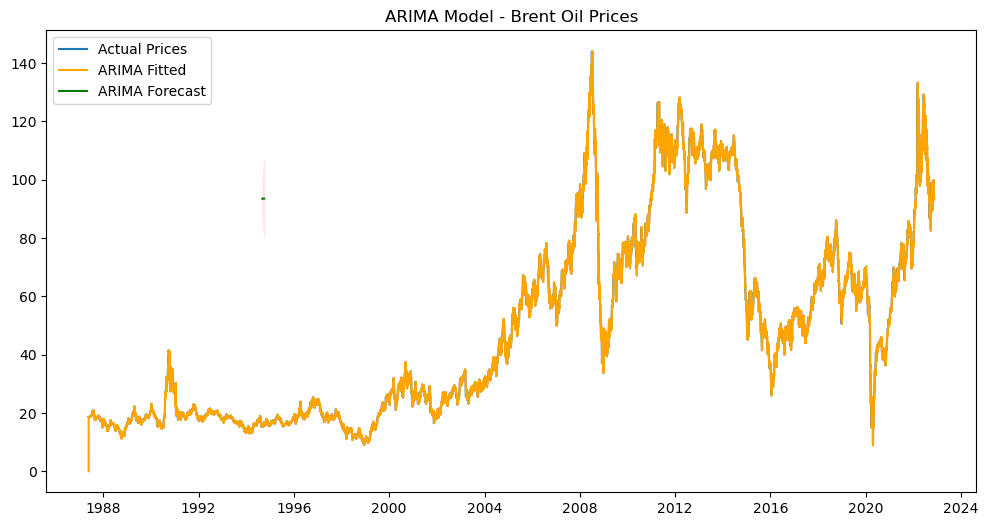

Iteration:      1,   Func. Count:      6,   Neg. LLF: 52624.80558077844
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4800724.474754425
Iteration:      3,   Func. Count:     23,   Neg. LLF: 10850.030931672278
Iteration:      4,   Func. Count:     28,   Neg. LLF: 28524.29235356613
Iteration:      5,   Func. Count:     34,   Neg. LLF: 22452.72930443288
Iteration:      6,   Func. Count:     40,   Neg. LLF: 10714.01687775617
Iteration:      7,   Func. Count:     46,   Neg. LLF: 10742.698065308947
Iteration:      8,   Func. Count:     52,   Neg. LLF: 10684.060944577948
Iteration:      9,   Func. Count:     58,   Neg. LLF: 10684.367722042358
Iteration:     10,   Func. Count:     64,   Neg. LLF: 10683.376295154987
Iteration:     11,   Func. Count:     69,   Neg. LLF: 10683.393850614613
Iteration:     12,   Func. Count:     84,   Neg. LLF: 56480.38255014448
Iteration:     13,   Func. Count:     96,   Neg. LLF: 25652.936244660752
Iteration:     14,   Func. Count:    106,   Neg. LLF: 108

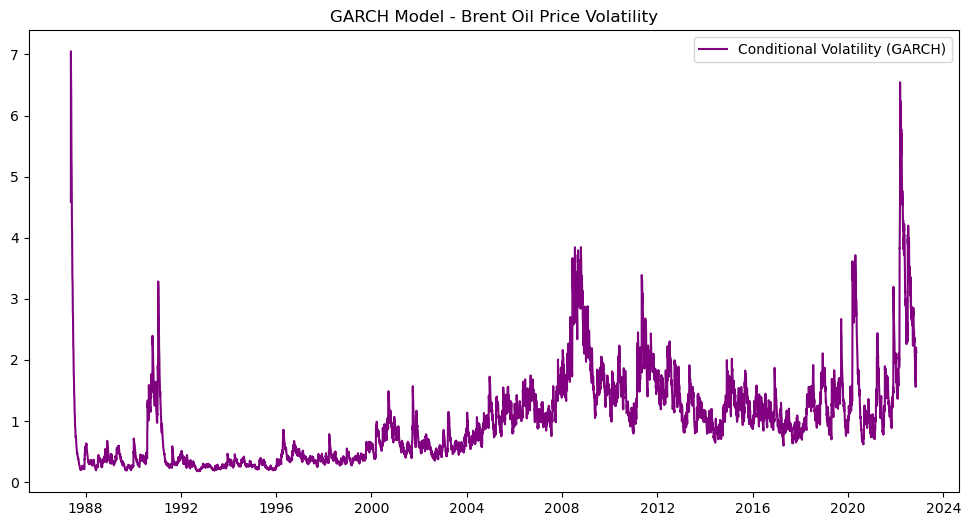

In [25]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt

# Assuming you have loaded your data into 'df' and preprocessed it
# Select only the 'Price' column for univariate time series analysis
price_data = df['Price']

# Step 1: Fit an ARIMA model
# ARIMA order chosen as (1, 1, 1) as an example; adjust as needed based on ACF/PACF analysis
arima_model = ARIMA(price_data, order=(1, 1, 1))  # This is now univariate data
arima_result = arima_model.fit()

# Forecast the trend
arima_forecast = arima_result.get_forecast(steps=30)
arima_forecast_ci = arima_forecast.conf_int()

# Step 2: Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(price_data, label='Actual Prices')
plt.plot(arima_result.fittedvalues, color='orange', label='ARIMA Fitted')
plt.plot(arima_forecast.predicted_mean, color='green', label='ARIMA Forecast')
plt.fill_between(arima_forecast_ci.index, arima_forecast_ci.iloc[:, 0], arima_forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Model - Brent Oil Prices')
plt.legend()
plt.show()

# Step 3: Fit a GARCH model to the residuals of the ARIMA model
residuals = arima_result.resid
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_result = garch_model.fit()

# Plot GARCH model volatility forecast
garch_volatility = garch_result.conditional_volatility
plt.figure(figsize=(12, 6))
plt.plot(garch_volatility, label='Conditional Volatility (GARCH)', color='purple')
plt.title('GARCH Model - Brent Oil Price Volatility')
plt.legend()
plt.show()


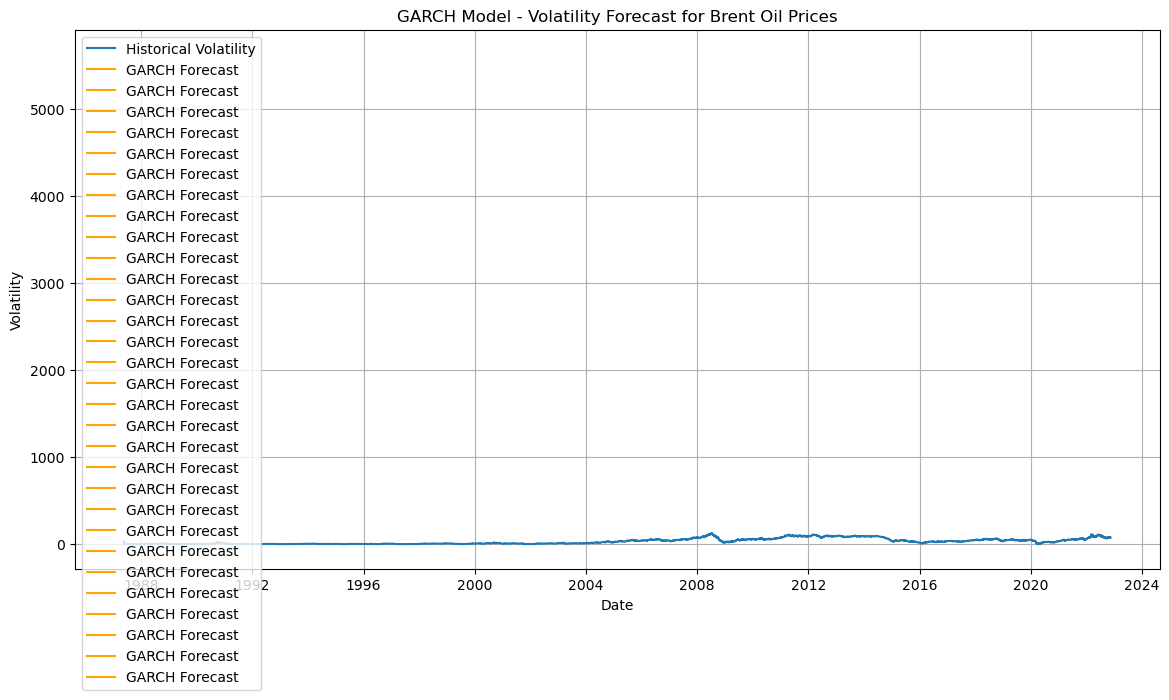

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -35221.8
Distribution:                  Normal   AIC:                           70451.5
Method:            Maximum Likelihood   BIC:                           70479.9
                                        No. Observations:                 9011
Date:                Thu, Oct 31 2024   Df Residuals:                     9010
Time:                        11:27:46   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            18.5742      0.108    172.353      0.000 [ 18.363, 18.78

In [26]:
# Fit GARCH model
garch_model = arch_model(price_data, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp="off")

# Forecast volatility
garch_forecast = garch_result.forecast(horizon=30)

# Plotting Volatility
plt.figure(figsize=(14, 7))
plt.plot(garch_result.conditional_volatility, label='Historical Volatility')
plt.plot(garch_forecast.variance[-1:], label='GARCH Forecast', color='orange')
plt.title('GARCH Model - Volatility Forecast for Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()

# Summary of the GARCH model
print(garch_result.summary())
